In [2]:
import requests

In [3]:
def query_by_category_name(solr_url, collection_name, category_name, num_results=10):
    # Define Solr query URL
    query_url = f'{solr_url}/{collection_name}/select'
    
    # Define Solr query parameters
    params = {
        'q': f'categoryName:"{category_name}"',  # Filter by CategoryName
        'group': 'true',  # Enable grouping
        'group.field': 'restaurant',  # Group by restaurant field to avoid duplicates
        'group.limit': 1,  # Limit to one document per group (top document for each restaurant)
        'rows': num_results,  # Limit number of results
        'debug': 'timing'  # Enable debug timing information
    }

    # Send GET request to Solr
    response = requests.get(query_url, params=params)

    # Check if request was successful (status code 200)
    if response.status_code == 200:
        # Parse JSON response
        results = response.json()
        grouped_results = results['grouped']['restaurant']['groups']
        
        # Get execution time from debug info
        debug_info = results['debug']
        execution_time = debug_info['timing']['time']
        
        print(f'Top {num_results} results with CategoryName "{category_name}":')
        print(f'Execution Time: {execution_time} ms\n')
        
        # # Process grouped results and print documents
        # for group in grouped_results:
        #     restaurant_doc = group['doclist']['docs'][0]
        #     print(restaurant_doc)

        # Process grouped results and print top restaurants with category name
        for group in grouped_results:
            restaurant_doc = group['doclist']['docs'][0]
            print(f"Restaurant: {restaurant_doc['restaurant']}, categoryName: {category_name}")
    else:
        print('Error:', response.status_code)

# Example usage:
solr_url = 'http://localhost:8983/solr'
collection_name = 'restaurantCore'  # Replace with your actual collection name
category_name = 'Chinese restaurant'  # Specify the CategoryName to filter by
query_by_category_name(solr_url, collection_name, category_name)


Top 10 results with CategoryName "Chinese restaurant":
Execution Time: 106.0 ms

Restaurant: 88 Seafood, categoryName: Chinese restaurant
Restaurant: Song Hua Jiang Restaurant, categoryName: Chinese restaurant
Restaurant: Hillman 99 Restaurant, categoryName: Chinese restaurant
Restaurant: Crystal Jade Hong Kong Kitchen, categoryName: Chinese restaurant
Restaurant: East Treasure Chinese Restaurant (東寶) Woods Square, categoryName: Chinese restaurant
Restaurant: Weng Jia Cai 翁家菜, categoryName: Chinese restaurant
Restaurant: Uncle Leong Signatures (FairPrice Hub), categoryName: Chinese restaurant
Restaurant: Peach Garden @ Thomson Plaza, categoryName: Chinese restaurant
Restaurant: Feng Shui Inn, categoryName: Chinese restaurant
Restaurant: Paradise Classic, categoryName: Chinese restaurant


In [4]:
import requests

def query_spell_check(solr_url, collection_name, query_term):
    # Define Solr query URL
    query_url = f'{solr_url}/{collection_name}/spell'
    
    # Define Solr query parameters
    params = {
        'spellcheck.q': query_term,  # Query term for spell checking
        'spellcheck': 'true',        # Enable spell checking
    }

    # Send GET request to Solr
    response = requests.get(query_url, params=params)

    # Check if request was successful (status code 200)
    if response.status_code == 200:
        # Parse JSON response
        results = response.json()
        print("Full response:", results)  # Debug: Print full response
    else:
        print('Error:', response.status_code)

# Example usage:
solr_url = 'http://localhost:8983/solr'
collection_name = 'restaurantCore'  # Replace with your actual collection name
query_term = 'serice'  # Misspelled term for testing
query_spell_check(solr_url, collection_name, query_term)


Error: 500


In [2]:
import requests
import json

# Configuration
solr_url = 'http://localhost:8983/solr'
core_name = 'restaurantCore'
output_file = 'solr_index_structure.md'

# Get schema information
schema_url = f'{solr_url}/{core_name}/schema'
schema_response = requests.get(schema_url)
schema_data = schema_response.json()

# Get index information using Luke
luke_url = f'{solr_url}/{core_name}/admin/luke?numTerms=0'
luke_response = requests.get(luke_url)
luke_data = luke_response.json()

# Start documenting
with open(output_file, 'w') as file:
    # Document title
    file.write(f'# Solr Index Structure for Core: {core_name}\n\n')

    # Fields information
    file.write('## Fields\n\n')
    for field in schema_data['schema']['fields']:
        file.write(f'- **{field["name"]}**\n')
        file.write(f'  - Type: {field["type"]}\n')
        file.write(f'  - Indexed: {"Yes" if field.get("indexed", False) else "No"}\n')
        file.write(f'  - Stored: {"Yes" if field.get("stored", False) else "No"}\n')
        file.write(f'  - MultiValued: {"Yes" if field.get("multiValued", False) else "No"}\n\n')

    # Index information
    file.write('## Index Information\n\n')
    file.write(f'- Number of Documents: {luke_data["index"]["numDocs"]}\n')
    file.write(f'- Max Document: {luke_data["index"]["maxDoc"]}\n')
    file.write(f'- Deleted Documents: {luke_data["index"]["deletedDocs"]}\n')
    file.write(f'- Segment Count: {luke_data["index"]["segmentCount"]}\n')

print(f'Documentation written to {output_file}')


Documentation written to solr_index_structure.md


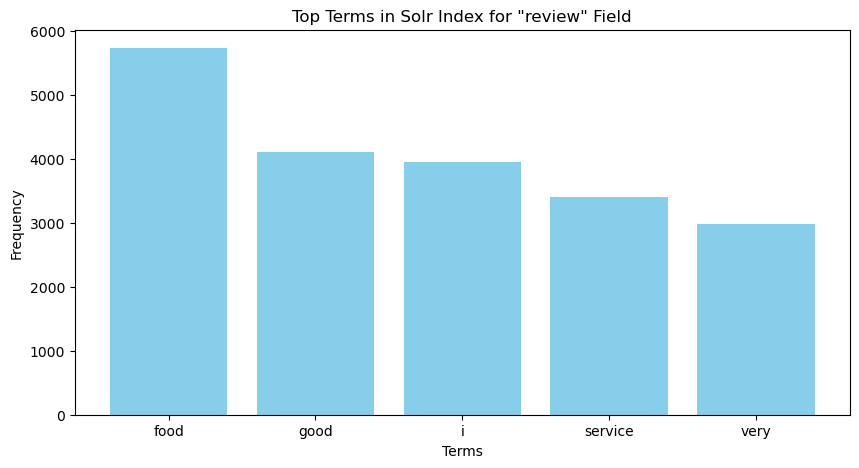

In [3]:
import matplotlib.pyplot as plt

# Response data (simplified here for demonstration purposes)
# This would be the part of your JSON under "fields" -> "review" -> "topTerms"
top_terms = ["food", "good", "i", "service", "very"]
term_counts = [5734, 4102, 3955, 3404, 2975]

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(top_terms, term_counts, color='skyblue')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Top Terms in Solr Index for "review" Field')
plt.show()


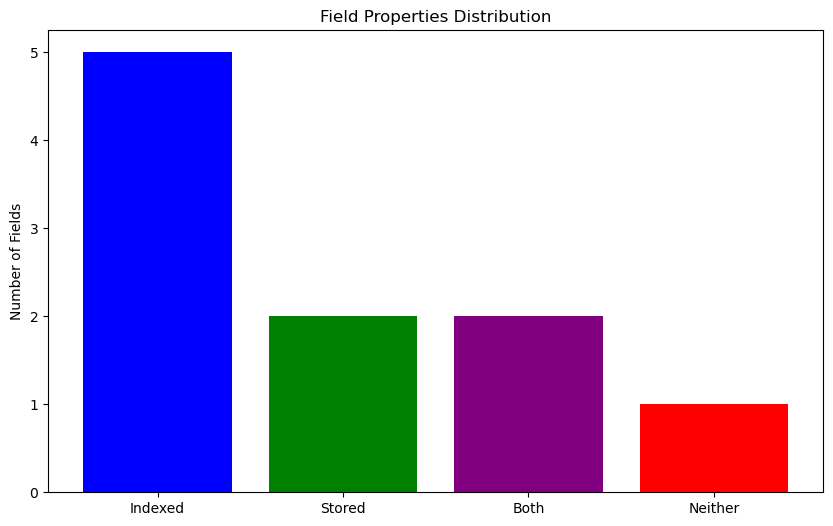

In [1]:
import matplotlib.pyplot as plt

# The response from Solr Schema API with actual data
fields_data = {
    "LatLong": {"indexed": True, "stored": True},
    "_root_": {"indexed": True, "stored": False},
    "_version_": {"indexed": False, "stored": False},
    # ... include all field data here ...
    "text": {"indexed": True, "stored": False},
    "text_rev": {"indexed": True, "stored": False},
    "totalScore": {"indexed": True, "stored": True},
}

# Analyze the data to count indexed and stored properties
indexed_count = sum(1 for field in fields_data.values() if field["indexed"])
stored_count = sum(1 for field in fields_data.values() if field["stored"])
both_count = sum(1 for field in fields_data.values() if field["indexed"] and field["stored"])
neither_count = sum(1 for field in fields_data.values() if not field["indexed"] and not field["stored"])

# Define labels and values for the plot
labels = ['Indexed', 'Stored', 'Both', 'Neither']
values = [indexed_count, stored_count, both_count, neither_count]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'purple', 'red'])
plt.title('Field Properties Distribution')
plt.ylabel('Number of Fields')
plt.show()


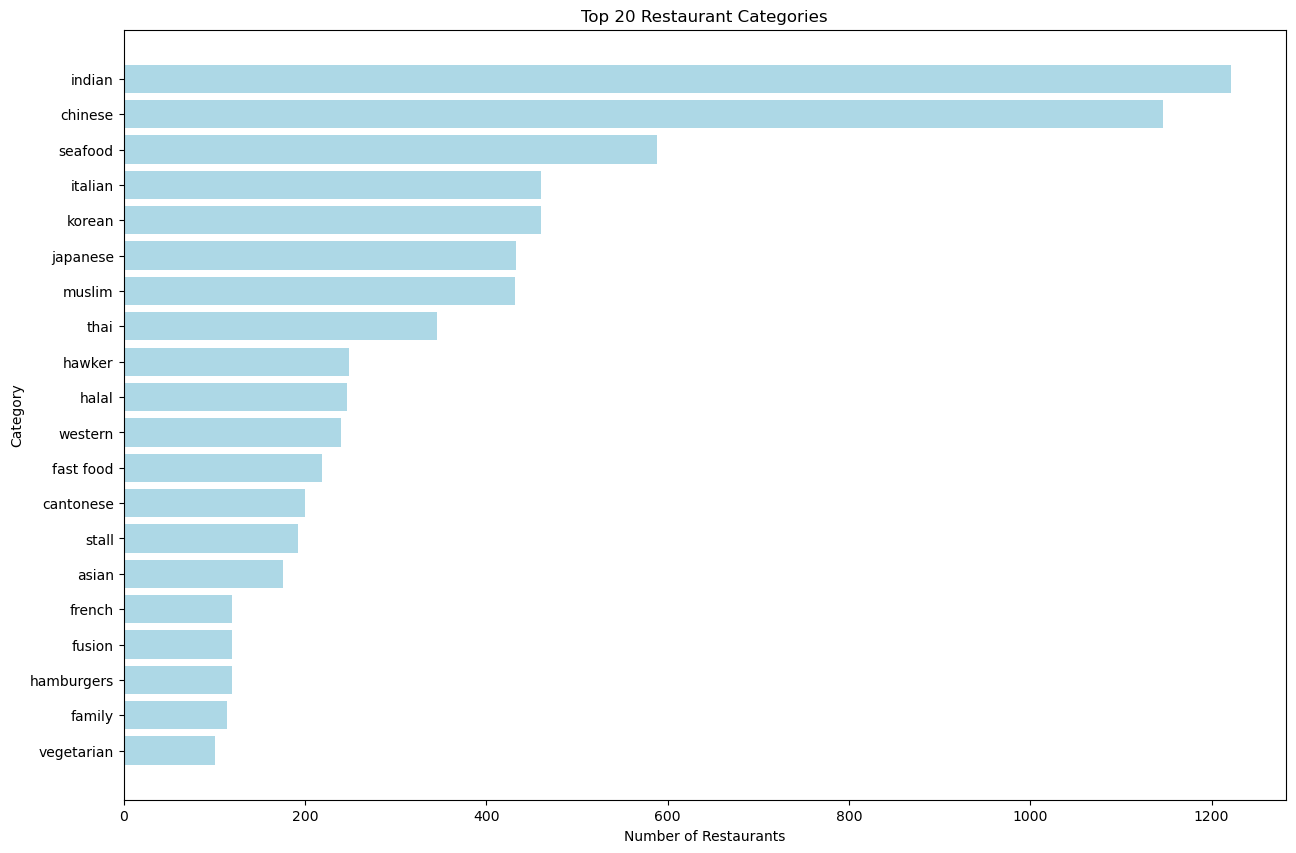

In [2]:
import matplotlib.pyplot as plt

# Data extracted from Solr response
category_counts = {
    "indian": 1221, "chinese": 1146, "seafood": 588,
    "italian": 460, "korean": 460, "japanese": 433, "muslim": 432,
    "thai": 346, "hawker": 249, "halal": 246, "western": 240,
    "fast food": 219, "cantonese": 200, "stall": 192, "asian": 176,
    "french": 120, "fusion": 120, "hamburgers": 120, "family": 114,
    "vegetarian": 101, "dim sum": 100, "sushi": 100, "bistro": 89,
    "singaporean": 89, "barbecue": 80, "cafe": 80, "fine dining": 80,
    "nyonya": 80, "shop": 80, "spanish": 80, "american": 60,
    "coffee": 60, "fish": 60, "mediterranean": 60, "pizza": 60,
    "center": 57, "yakiniku": 50, "andhra": 40, "bar": 40,
    "conveyor belt": 40, "brewpub": 40, "german": 40, "modern": 40,
    "noodle": 40, "north": 40, "ramen": 40, "swedish": 40,
    "tonkatsu": 40, "argentinian": 20, "australian": 20, "authentic": 20,
    "catalonian": 20, "chicken": 20, "european": 20, "filipino": 20,
    "gluten-free": 20, "greek": 20, "gyudon": 20, "hong kong": 20,
    "hot pot": 20, "house": 20, "indonesian": 20, "izakaya": 20,
    "latin": 20, "lounge": 20, "mandarin": 20, "mexican": 20,
    "okonomiyaki": 20, "porridge": 20, "salad": 20, "sichuan": 20,
    "south": 20, "southeast": 20, "steak": 20, "style": 20,
    "swiss": 20, "taiwanese": 20, "takeaway": 20, "tempura": 20,
    "turkish": 20, "unagi": 20, "market": 6, "satay": 5, "brunch": 3
}

# Sorting categories by count
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Unpacking the sorted data
categories, counts = zip(*sorted_categories)

# Plotting
plt.figure(figsize=(15, 10))
plt.barh(categories[:20], counts[:20], color='lightblue')  # Top 20 categories
plt.xlabel('Number of Restaurants')
plt.ylabel('Category')
plt.title('Top 20 Restaurant Categories')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()
